# CZ1115 Mini Project
---

### Objective:
Our final target is to predict "Revenue" of a movie, based on the numerical variables given in The Movie Database(TMDB). And to observe the influence of the non numerical variables on the revenue generated by a movie

### Sub-Problems:
- Which variable (Vote Average, Popularity, Budget) is the most accurate in predicting revenue?
- Which variable (Vote Average, Popularity, Budget) is the most accurate in predicting whether the movie makes a loss or profit?
- Which production companies produces films with the highest revenues?
- Which actor tends to have the greatest influence over the revenue of the film?
- Which genre type of movie tends to have higher revenues?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import itertools
import plotly
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import requests
sb.set()

To retrieve the dataset from the database, we wrote a code to extract the API data into a csv file.

## Data Extraction, Curation, Preparation and Cleaning

#### Import dataset from the csv file obtained from api

In [2]:
df = pd.read_csv('TMDB Movies.csv')
df.head()

id     Imdb Id Release Date      Revenue       Budget  Vote Average  \
0       NaN         NaN          NaN          NaN          NaN           NaN   
1  399566.0   tt5034838   24/03/2021  123100000.0  200000000.0           8.7   
2       NaN         NaN          NaN          NaN          NaN           NaN   
3  791373.0  tt12361974   18/03/2021          0.0   70000000.0           8.6   
4       NaN         NaN          NaN          NaN          NaN           NaN   

   Popularity  Runtime                               Production Companies  \
0         NaN      NaN                                                NaN   
1   11701.435    113.0    ['Warner Bros. Pictures', 'Legendary Pictures']   
2         NaN      NaN                                                NaN   
3    7337.834    242.0  ['Warner Bros. Pictures', 'The Stone Quarry', ...   
4         NaN      NaN                                                NaN   

                                              Genres  \
0                                                NaN   
1                      ['Action', 'Science Fiction']   
2                                                NaN   
3  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
4                                                NaN   

                                           Main Cast  
0                                                NaN  
1  ['Alexander Skarsgård', 'Millie Bobby Brown', ...  
2                                                NaN  
3  ['Ben Affleck', 'Henry Cavill', 'Gal Gadot', '...  
4                                                NaN

#### Filter movies with 0 Revenue and 0 Budget

In [3]:
df = df.loc[(df['Revenue'] > 0) & (df['Budget'] > 0)]
df.head()

id    Imdb Id Release Date      Revenue       Budget  Vote Average  \
1   399566.0  tt5034838   24/03/2021  123100000.0  200000000.0           8.7   
11  458576.0  tt6475714   03/12/2020   25814306.0   60000000.0           7.1   
13  587807.0  tt1361336   11/02/2021   66890000.0   50000000.0           7.4   
15  464052.0  tt7126948   16/12/2020  165160000.0  200000000.0           6.8   
23  686487.0  tt0056142   26/06/1963    2700000.0      12000.0           7.1   

    Popularity  Runtime                               Production Companies  \
1    11701.435    113.0    ['Warner Bros. Pictures', 'Legendary Pictures']   
11    1720.013    104.0  ['CAPCOM', 'Constantin Film', 'Impact Pictures...   
13    1625.778    101.0  ['Warner Animation Group', 'Warner Bros. Pictu...   
15    1689.501    151.0  ['DC Entertainment', 'Warner Bros. Pictures', ...   
23     782.990     91.0  ['Toho Company, Ltd.', 'Universal Internationa...   

                                               Genres  \
1                       ['Action', 'Science Fiction']   
11                 ['Fantasy', 'Action', 'Adventure']   
13                     ['Action', 'Comedy', 'Family']   
15                 ['Fantasy', 'Action', 'Adventure']   
23  ['Science Fiction', 'Action', 'Adventure', 'Fa...   

                                            Main Cast  
1   ['Alexander Skarsgård', 'Millie Bobby Brown', ...  
11  ['Milla Jovovich', 'Tony Jaa', 'T.I.', 'Ron Pe...  
13  ['Chloë Grace Moretz', 'Michael Peña', 'Colin ...  
15  ['Gal Gadot', 'Chris Pine', 'Kristen Wiig', 'P...  
23  ['Harry Holcombe', 'Michael Keith', 'James Yag...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 1 to 19993
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4316 non-null   float64
 1   Imdb Id               4316 non-null   object 
 2   Release Date          4316 non-null   object 
 3   Revenue               4316 non-null   float64
 4   Budget                4316 non-null   float64
 5   Vote Average          4316 non-null   float64
 6   Popularity            4316 non-null   float64
 7   Runtime               4316 non-null   float64
 8   Production Companies  4316 non-null   object 
 9   Genres                4316 non-null   object 
 10  Main Cast             4316 non-null   object 
dtypes: float64(6), object(5)
memory usage: 404.6+ KB


In [5]:
df.shape

(4316, 11)

In [6]:
df.duplicated(keep = 'last')

1        False
11       False
13       False
15       False
23       False
         ...  
19973    False
19977    False
19983    False
19989    False
19993    False
Length: 4316, dtype: bool

### Exploratory Data Analysis

In [7]:
df_numerical = df.drop(columns = ["id", "Imdb Id", "Release Date", "Genres", "Main Cast", "Production Companies"])
df_numerical.head()

Revenue       Budget  Vote Average  Popularity  Runtime
1   123100000.0  200000000.0           8.7   11701.435    113.0
11   25814306.0   60000000.0           7.1    1720.013    104.0
13   66890000.0   50000000.0           7.4    1625.778    101.0
15  165160000.0  200000000.0           6.8    1689.501    151.0
23    2700000.0      12000.0           7.1     782.990     91.0

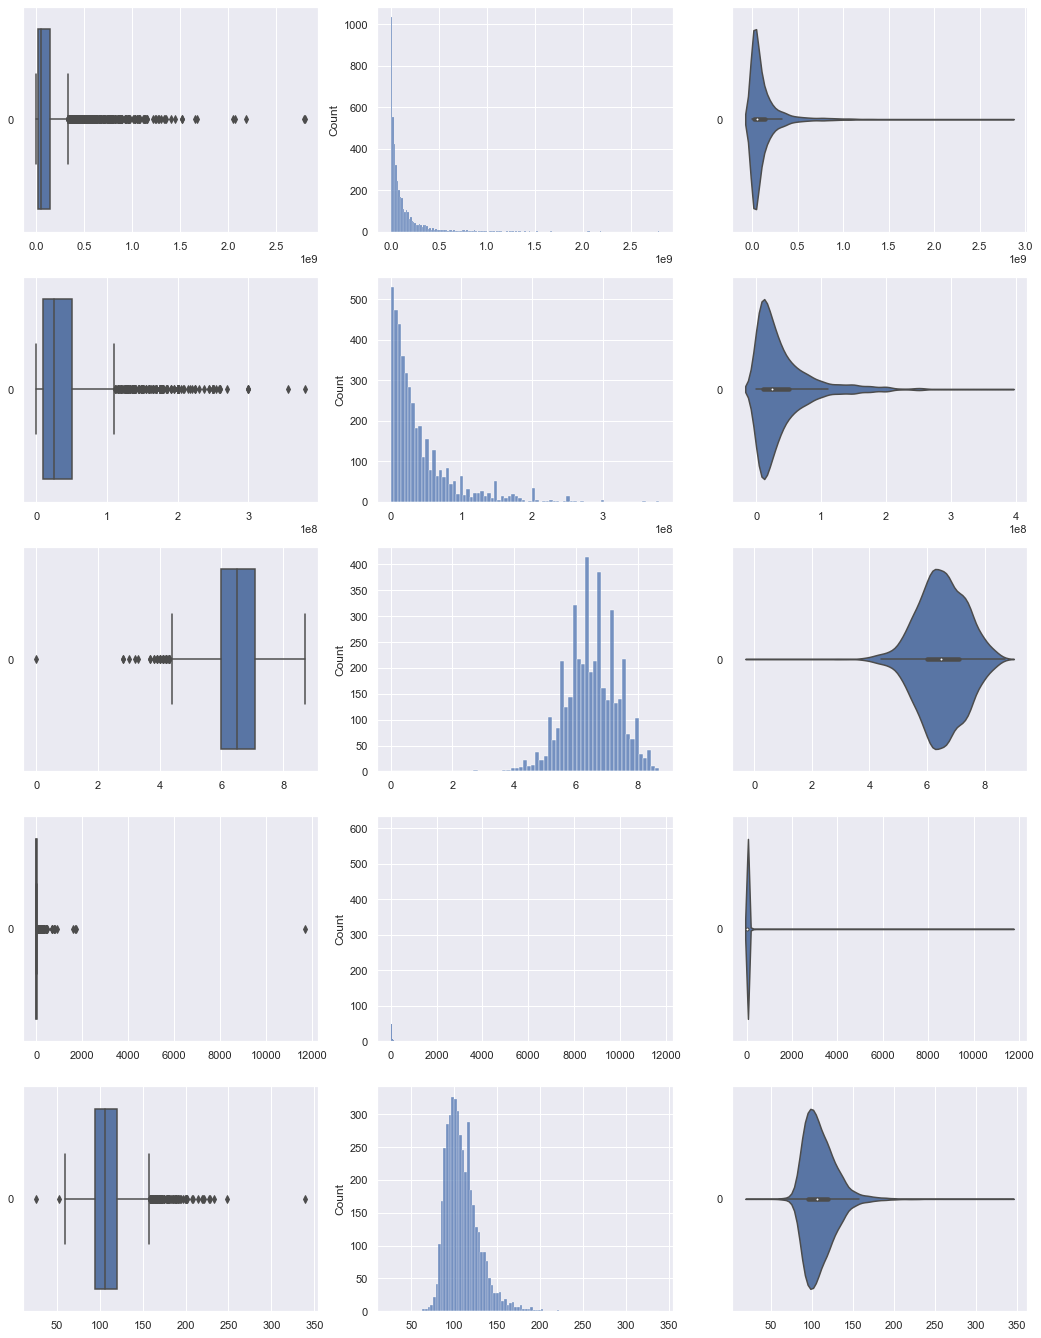

In [8]:
f, axes = plt.subplots(5, 3, figsize = (18, 24))
count = 0

for var in df_numerical:
    sb.boxplot(data = df_numerical[var].values, orient = "h", ax = axes[count,0])
    sb.histplot(data = df_numerical[var].values, ax = axes[count,1])
    sb.violinplot(data = df_numerical[var].values, orient = "h", ax = axes[count,2])
    count += 1

## Which variable (Vote Average, Popularity, Budget) is the most accurate in predicting revenue?

In [9]:
df_numerical.corr()

Revenue    Budget  Vote Average  Popularity   Runtime
Revenue       1.000000  0.715791      0.223138    0.075077  0.256886
Budget        0.715791  1.000000      0.027468    0.126771  0.265174
Vote Average  0.223138  0.027468      1.000000    0.071547  0.409288
Popularity    0.075077  0.126771      0.071547    1.000000  0.023563
Runtime       0.256886  0.265174      0.409288    0.023563  1.000000

In [10]:
df_numerical.describe()

Revenue        Budget  Vote Average    Popularity      Runtime
count  4.316000e+03  4.316000e+03   4316.000000   4316.000000  4316.000000
mean   1.233910e+08  3.976906e+07      6.503174     31.198987   109.512048
std    2.019767e+08  4.513917e+07      0.839694    188.226802    20.378336
min    1.000000e+00  5.000000e+00      0.000000      6.964000    26.000000
25%    1.667413e+07  1.000000e+07      6.000000     12.712500    95.000000
50%    5.318463e+07  2.500000e+07      6.500000     16.686500   106.000000
75%    1.428734e+08  5.000000e+07      7.100000     27.169000   120.000000
max    2.797801e+09  3.800000e+08      8.700000  11701.435000   339.000000

<AxesSubplot:>

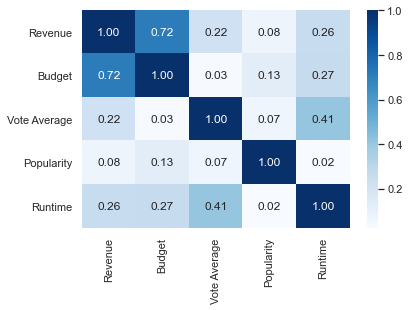

In [11]:
sb.heatmap(df_numerical.corr(), annot = True, fmt = ".2f", cmap="Blues")

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

# X 
budget = pd.DataFrame(df_numerical['Budget']) # first predictor
vote_average = pd.DataFrame(df_numerical['Vote Average'])
popularity = pd.DataFrame(df_numerical['Popularity'])
runtime = pd.DataFrame(df_numerical['Runtime'])

# Y
revenue = pd.DataFrame(df_numerical['Revenue'])

# Split the data 
budget_train, budget_test , vote_avg_train, vote_avg_test, pop_train, pop_test, revenue_train, revenue_test, runtime_train, runtime_test = train_test_split(budget, vote_average, popularity, revenue, runtime, test_size = 0.3)

#### Regression: Revenue VS Budget

In [13]:
# Train the regression model for revenue against budget
linreg.fit(budget_train, revenue_train)

LinearRegression()

Intercept 	: b =  [-2747035.50991029]
Coefficients 	: a =  [[3.19003047]]


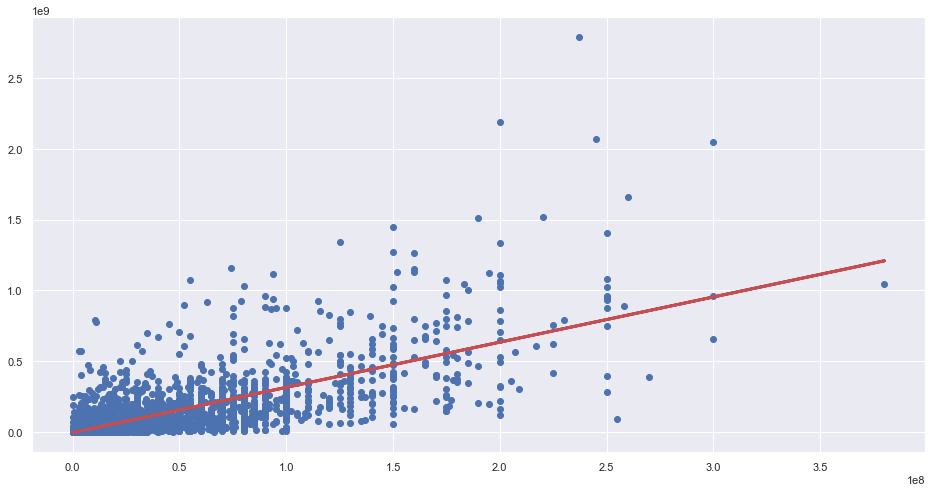

Explained Variance (R^2) 	: 0.5017512215223092
Mean Squared Error (MSE) 	: 2.057120328800302e+16
Root Mean Squared Error (RMSE) 	: 143426647.76115707


In [14]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = budget_train
regline_y = linreg.intercept_ + linreg.coef_ * budget_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(budget_train, revenue_train) # Draw the scatterplot 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # Draws the regression line 
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(budget_train, revenue_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_train, regline_y)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

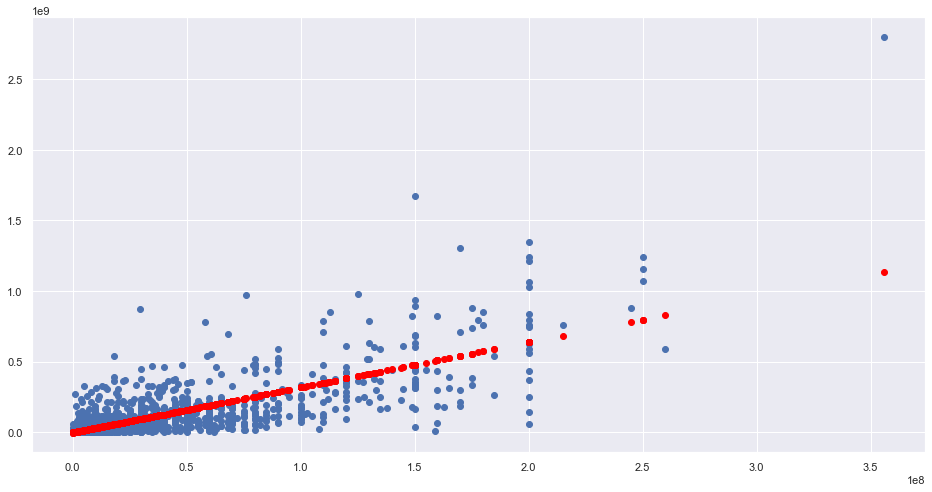

Explained Variance (R^2) 	: 0.5380674097987008
Mean Squared Error (MSE) 	: 1.829903031023038e+16
Root Mean Squared Error (RMSE) 	: 135273908.4606872


In [15]:
# Predict Total values corresponding to HP Test
revenue_test_pred = linreg.predict(budget_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(budget_test, revenue_test)
plt.scatter(budget_test, revenue_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(budget_test, revenue_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_test, revenue_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#### Revenue VS Vote Average

Intercept 	: b =  [-2.37093667e+08]
Coefficients 	: a =  [[55386875.48072795]]


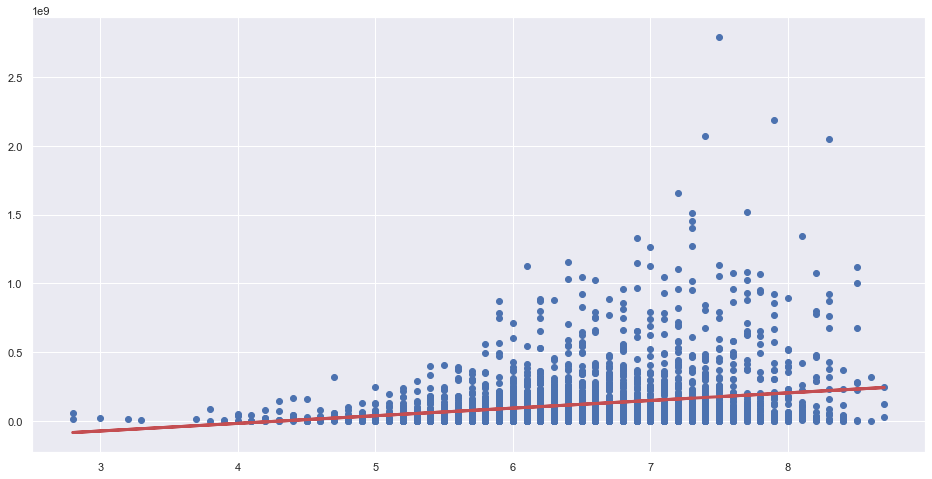

Explained Variance (R^2) 	: 0.05295069709764155
Mean Squared Error (MSE) 	: 3.910083591833286e+16
Root Mean Squared Error (RMSE) 	: 197739313.03191295


In [16]:
# Train the regression model for revenue against budget
linreg.fit(vote_avg_train, revenue_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = vote_avg_train
regline_y = linreg.intercept_ + linreg.coef_ * vote_avg_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(vote_avg_train, revenue_train) # Draw the scatterplot 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # Draws the regression line 
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(vote_avg_train, revenue_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_train, regline_y)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

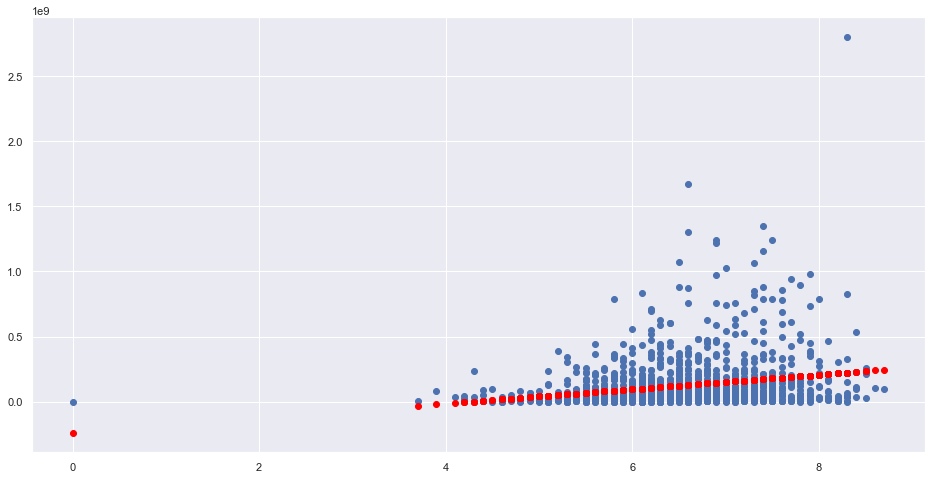

Explained Variance (R^2) 	: 0.041921320278728524
Mean Squared Error (MSE) 	: 3.795339660309541e+16
Root Mean Squared Error (RMSE) 	: 194816315.03314963


In [17]:
revenue_test_pred = linreg.predict(vote_avg_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(vote_avg_test, revenue_test)
plt.scatter(vote_avg_test, revenue_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(vote_avg_test, revenue_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_test, revenue_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#### Revenue VS Popularity 

Intercept 	: b =  [1.21651275e+08]
Coefficients 	: a =  [[58612.02519205]]


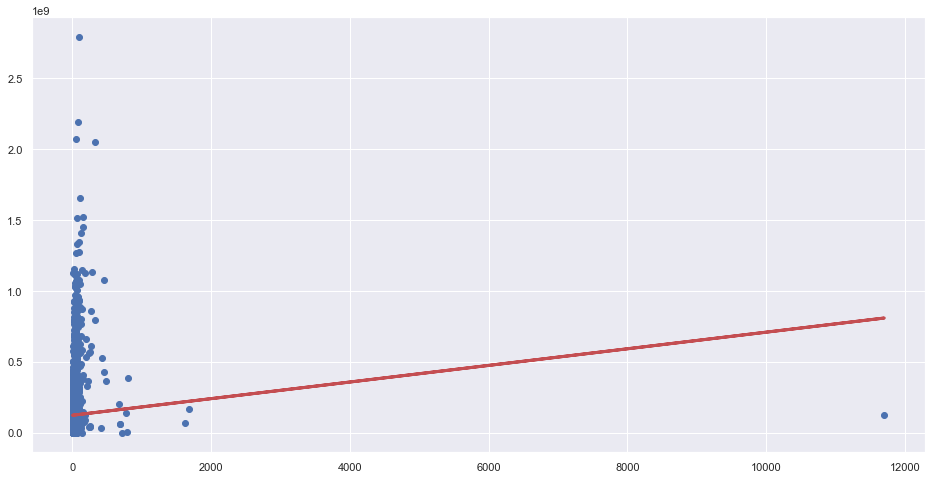

Explained Variance (R^2) 	: 0.004075149503759312
Mean Squared Error (MSE) 	: 4.11187612375642e+16
Root Mean Squared Error (RMSE) 	: 202777615.22802314


In [18]:
# Train the regression model for revenue against budget
linreg.fit(pop_train, revenue_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = pop_train
regline_y = linreg.intercept_ + linreg.coef_ * pop_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(pop_train, revenue_train) # Draw the scatterplot 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # Draws the regression line 
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(pop_train, revenue_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_train, regline_y)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

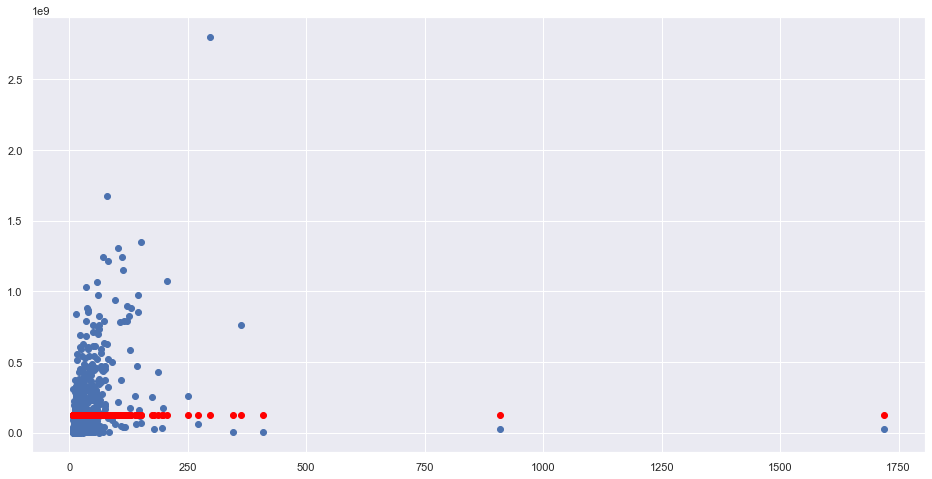

Explained Variance (R^2) 	: 0.007991036584207634
Mean Squared Error (MSE) 	: 3.961103099961101e+16
Root Mean Squared Error (RMSE) 	: 199025201.92078945


In [19]:
revenue_test_pred = linreg.predict(vote_avg_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(pop_test, revenue_test)
plt.scatter(pop_test, revenue_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(pop_test, revenue_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_test, revenue_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#### Revenue VS Runtime

Intercept 	: b =  [-1.61603261e+08]
Coefficients 	: a =  [[2599243.25259431]]


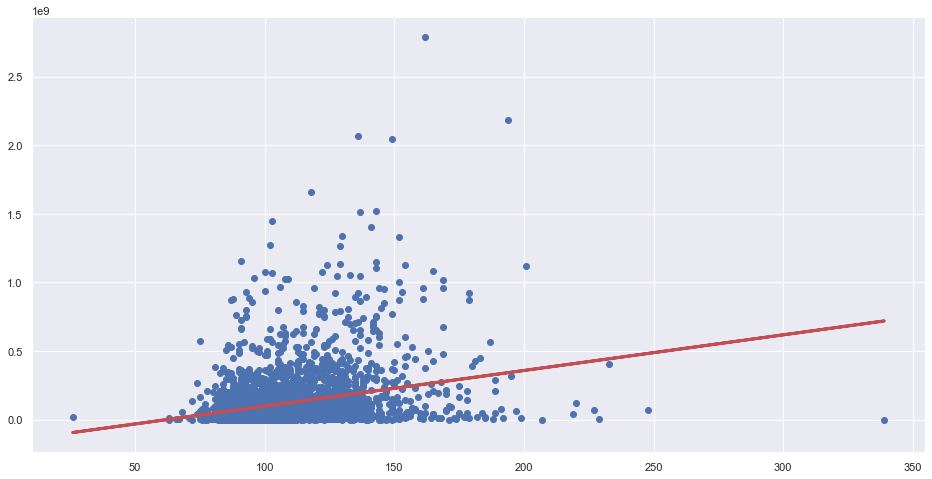

Explained Variance (R^2) 	: 0.06969939262856573
Mean Squared Error (MSE) 	: 3.8409332325231864e+16
Root Mean Squared Error (RMSE) 	: 195982989.88746923


In [20]:
# Train the regression model for revenue against budget
linreg.fit(runtime_train, revenue_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = runtime_train
regline_y = linreg.intercept_ + linreg.coef_ * runtime_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(runtime_train, revenue_train) # Draw the scatterplot 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # Draws the regression line 
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(runtime_train, revenue_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_train, regline_y)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

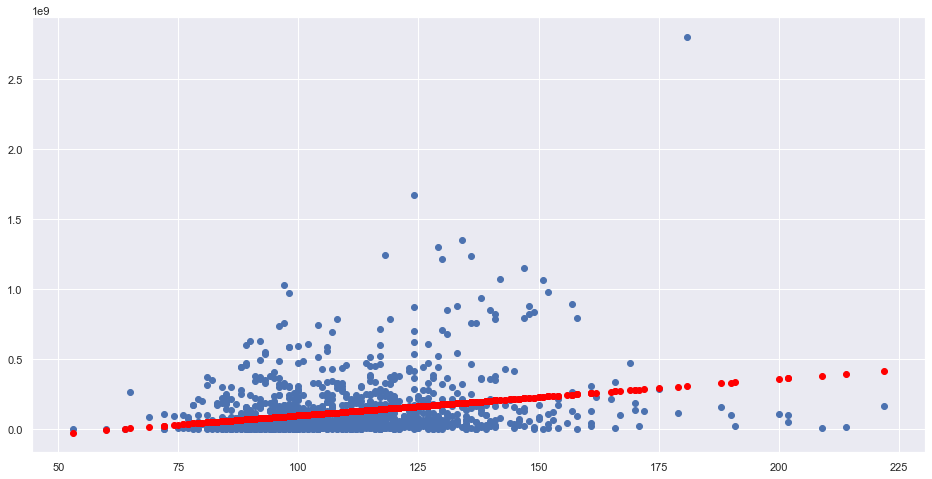

Explained Variance (R^2) 	: 0.05685920551079415
Mean Squared Error (MSE) 	: 3.73616461606484e+16
Root Mean Squared Error (RMSE) 	: 193291609.1315099


In [21]:
revenue_test_pred = linreg.predict(runtime_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(runtime_test, revenue_test)
plt.scatter(runtime_test, revenue_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(runtime_test, revenue_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(revenue_test, revenue_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# Classification Tree

In [22]:
df['Profit/Loss'] = ""
df['Profit/Loss'] = df.astype('str')

Additional Profit/Loss columns. A movie is considered to have made a profit when Revenue is >= 2 * Budget, else it is considered to have made a loss.

In [23]:
df.loc[(df["Revenue"] >= 2 * df["Budget"]) & (df["Revenue"] <= (2 * df["Budget"] + (5 / 100) * df["Budget"])), "Profit/Loss"] = "Breakeven"
#df.loc[(df["Revenue"] >= 2 * df["Budget"]), "Success"] = "Profit"
df.loc[df["Revenue"] > (2 * df["Budget"] + (5 / 100) * df["Budget"]), "Profit/Loss"] = "Profit"
df.loc[df["Revenue"] < 2 * df["Budget"], "Profit/Loss"] = "Loss"
df

id    Imdb Id Release Date      Revenue       Budget  \
1      399566.0  tt5034838   24/03/2021  123100000.0  200000000.0   
11     458576.0  tt6475714   03/12/2020   25814306.0   60000000.0   
13     587807.0  tt1361336   11/02/2021   66890000.0   50000000.0   
15     464052.0  tt7126948   16/12/2020  165160000.0  200000000.0   
23     686487.0  tt0056142   26/06/1963    2700000.0      12000.0   
...         ...        ...          ...          ...          ...   
19973    9726.0  tt0401445   09/09/2006   42064105.0   35000000.0   
19977   15019.0  tt0466839   11/05/2007    9576495.0   24000000.0   
19983   31908.0  tt0116410   20/12/1996   13323144.0   36000000.0   
19989   16553.0  tt0412922   30/09/2005    1117920.0     385373.0   
19993    8860.0  tt0119664   16/01/1997   31987563.0   55000000.0   

       Vote Average  Popularity  Runtime  \
1               8.7   11701.435    113.0   
11              7.1    1720.013    104.0   
13              7.4    1625.778    101.0   
15              6.8    1689.501    151.0   
23              7.1     782.990     91.0   
...             ...         ...      ...   
19973           6.7      12.901    117.0   
19977           5.9      10.901     97.0   
19983           6.4       9.879    130.0   
19989           7.0      10.349     84.0   
19993           5.7      11.598    117.0   

                                    Production Companies  \
1        ['Warner Bros. Pictures', 'Legendary Pictures']   
11     ['CAPCOM', 'Constantin Film', 'Impact Pictures...   
13     ['Warner Animation Group', 'Warner Bros. Pictu...   
15     ['DC Entertainment', 'Warner Bros. Pictures', ...   
23     ['Toho Company, Ltd.', 'Universal Internationa...   
...                                                  ...   
19973    ['Fox 2000 Pictures', 'Scott Free Productions']   
19977  ['I Could Never Ltd.', 'Scott Rudin Production...   
19983  ['Columbia Pictures', 'Castle Rock Entertainme...   
19989  ['Regency Enterprises', 'New Regency Pictures'...   
19993        ['Caravan Pictures', 'Touchstone Pictures']   

                                                  Genres  \
1                          ['Action', 'Science Fiction']   
11                    ['Fantasy', 'Action', 'Adventure']   
13                        ['Action', 'Comedy', 'Family']   
15                    ['Fantasy', 'Action', 'Adventure']   
23     ['Science Fiction', 'Action', 'Adventure', 'Fa...   
...                                                  ...   
19973                     ['Comedy', 'Drama', 'Romance']   
19977                     ['Comedy', 'Drama', 'Romance']   
19983                                          ['Drama']   
19989                              ['Comedy', 'Romance']   
19993  ['Action', 'Adventure', 'Comedy', 'Crime', 'Th...   

                                               Main Cast Profit/Loss  
1      ['Alexander Skarsgård', 'Millie Bobby Brown', ...        Loss  
11     ['Milla Jovovich', 'Tony Jaa', 'T.I.', 'Ron Pe...        Loss  
13     ['Chloë Grace Moretz', 'Michael Peña', 'Colin ...        Loss  
15     ['Gal Gadot', 'Chris Pine', 'Kristen Wiig', 'P...        Loss  
23     ['Harry Holcombe', 'Michael Keith', 'James Yag...      Profit  
...                                                  ...         ...  
19973  ['Russell Crowe', 'Marion Cotillard', 'Albert ...        Loss  
19977  ['Michelle Pfeiffer', 'Paul Rudd', 'Saoirse Ro...        Loss  
19983  ['Alec Baldwin', 'Whoopi Goldberg', 'James Woo...        Loss  
19989  ['Josh Hutcherson', 'Charlie Ray', 'Bradley Wh...      Profit  
19993  ['Eddie Murphy', 'Kim Miyori', 'Art Evans', 'J...        Loss  

[4316 rows x 12 columns]

<AxesSubplot:xlabel='Budget', ylabel='Profit/Loss'>

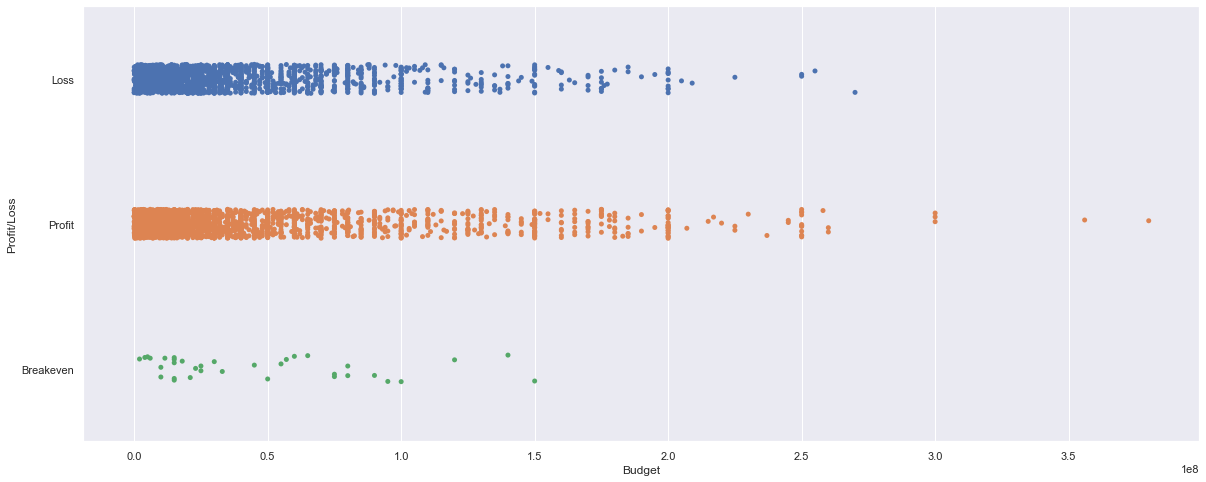

In [24]:
PnLBudget = pd.concat([df['Profit/Loss'], df['Budget']], axis = 1).reindex(df['Profit/Loss'].index)

f = plt.figure(figsize=(20, 8))
sb.stripplot(x = 'Budget', y = 'Profit/Loss', data = PnLBudget, size = 5.0)

<AxesSubplot:xlabel='Popularity', ylabel='Profit/Loss'>

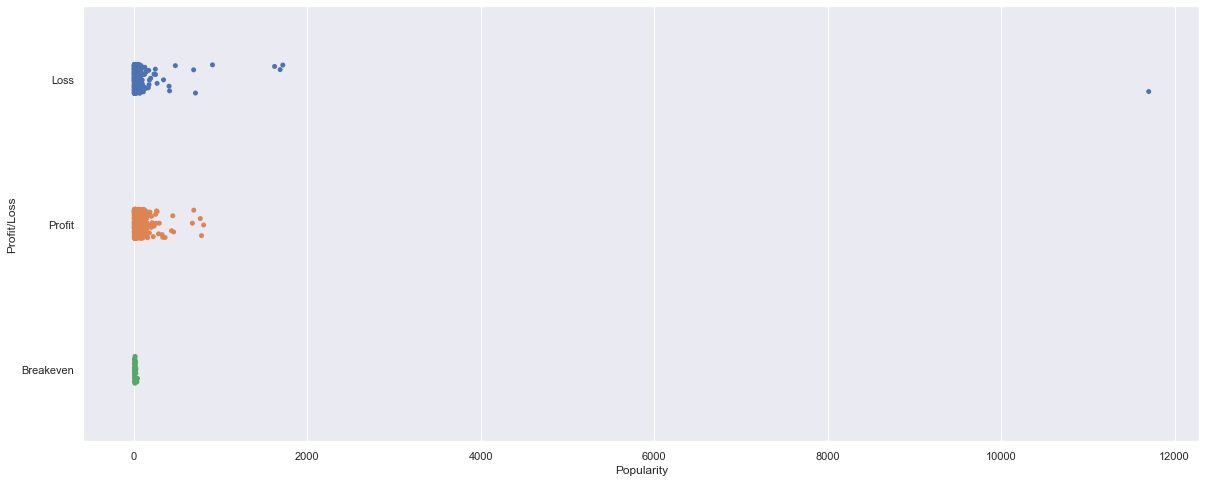

In [25]:
PnLPopularity = pd.concat([df['Profit/Loss'], df['Popularity']], axis = 1).reindex(df['Profit/Loss'].index)

f = plt.figure(figsize=(20, 8))
sb.stripplot(x = 'Popularity', y = 'Profit/Loss', data = PnLPopularity, size = 5.0)

<AxesSubplot:xlabel='Vote Average', ylabel='Profit/Loss'>

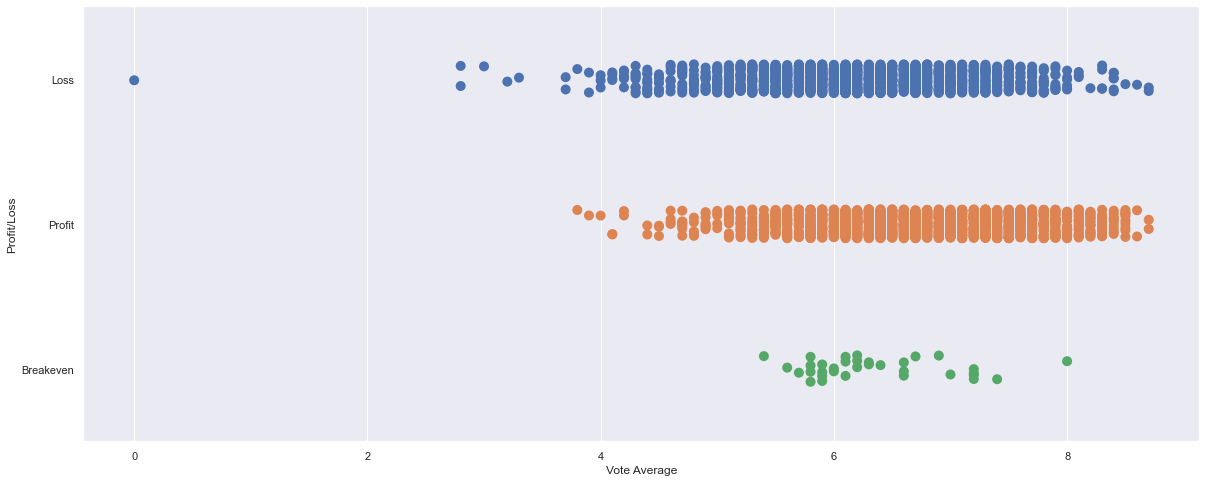

In [26]:
PnLVoteAve = pd.concat([df['Profit/Loss'], df['Vote Average']], axis = 1).reindex(df['Profit/Loss'].index)

f = plt.figure(figsize=(20, 8))
sb.stripplot(x = 'Vote Average', y = 'Profit/Loss', data = PnLVoteAve, size = 10.0)

In [27]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [28]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(df['Profit/Loss']) #for prediction of categories using numeric, y would be a category variable
X = pd.DataFrame(df[['Budget', 'Popularity', 'Vote Average']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = int(0.3 * 4148))

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)


Train Set : (3072, 3) (3072, 1)
Test Set  : (1244, 3) (1244, 1)


In [29]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'Popularity <= 15.131\ngini = 0.501\nsamples = 3072\nvalue = [20, 1360, 1692]\nclass = Profit'),
 Text(334.8, 652.32, 'Vote Average <= 6.65\ngini = 0.489\nsamples = 1288\nvalue = [12, 766, 510]\nclass = Loss'),
 Text(167.4, 217.44000000000005, 'gini = 0.434\nsamples = 823\nvalue = [8, 567, 248]\nclass = Loss'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.499\nsamples = 465\nvalue = [4, 199, 262]\nclass = Profit'),
 Text(1004.4000000000001, 652.32, 'Vote Average <= 6.75\ngini = 0.45\nsamples = 1784\nvalue = [8, 594, 1182]\nclass = Profit'),
 Text(837.0, 217.44000000000005, 'gini = 0.494\nsamples = 1004\nvalue = [6, 420, 578]\nclass = Profit'),
 Text(1171.8, 217.44000000000005, 'gini = 0.351\nsamples = 780\nvalue = [2, 174, 604]\nclass = Profit')]

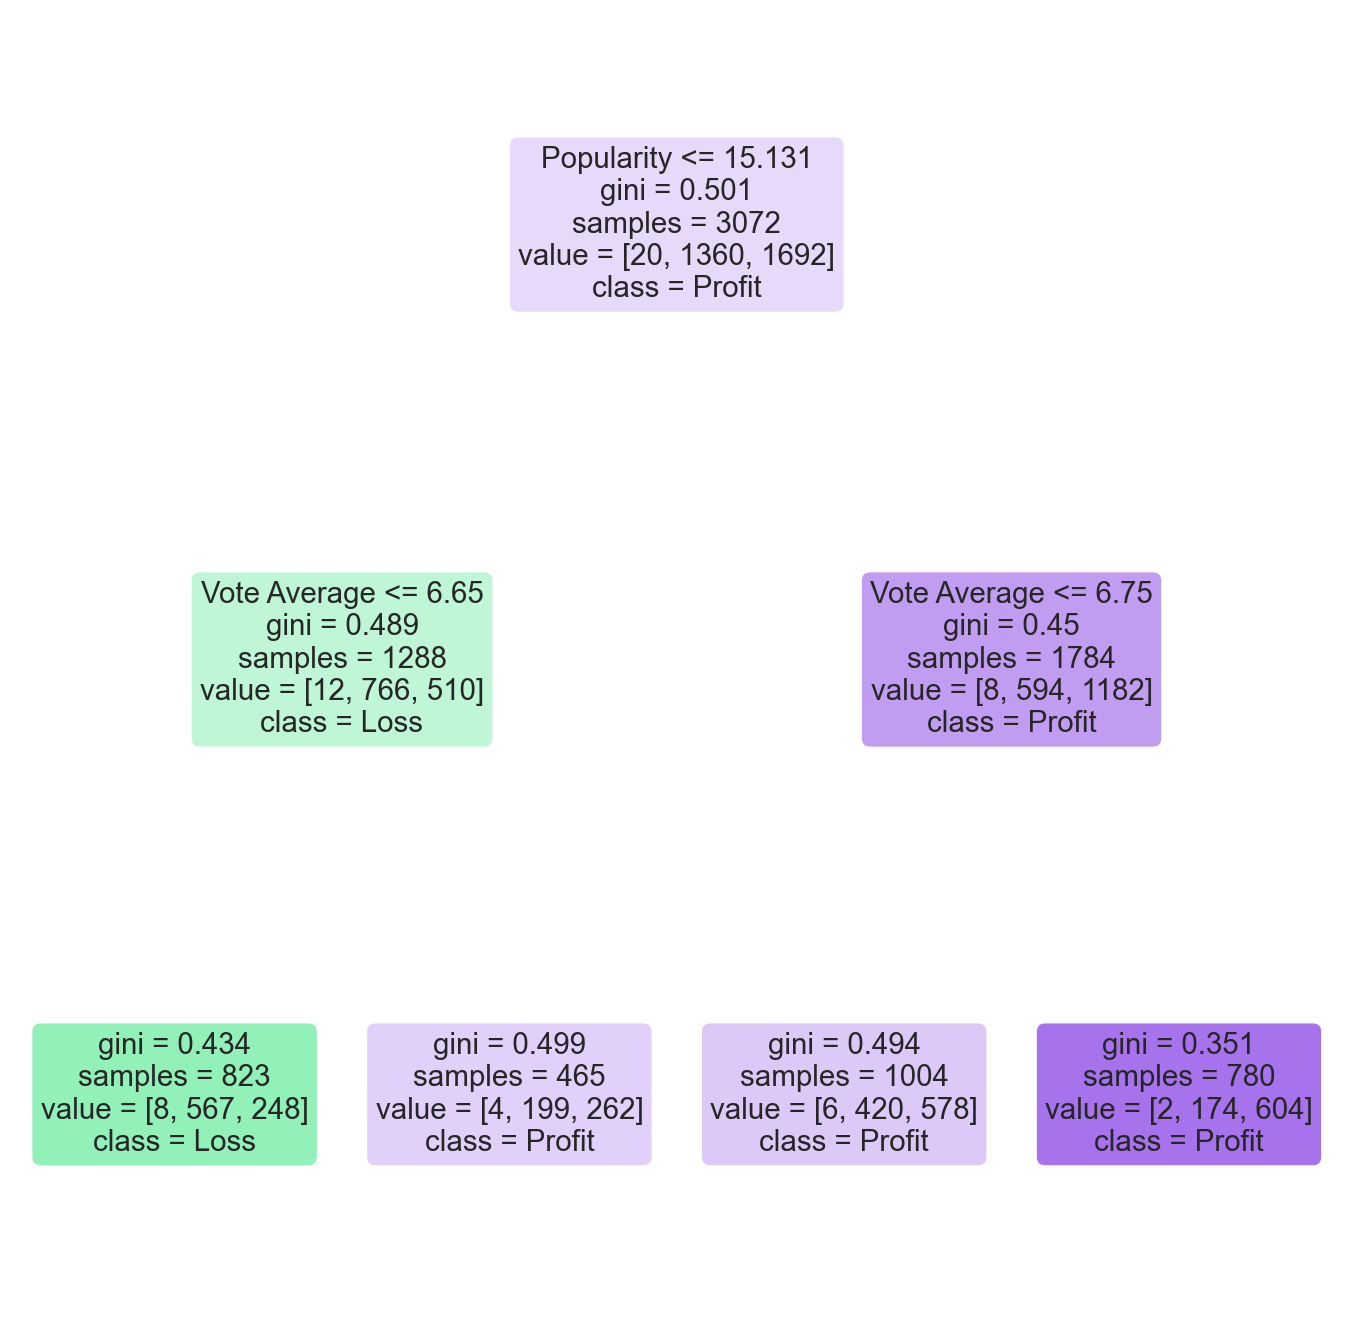

In [30]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names = ["Breakeven", "Loss", "Profit"])

In [31]:
dectree.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'Popularity <= 14.914\ngini = 0.508\nsamples = 1244\nvalue = [15, 561, 668]\nclass = Profit'),
 Text(334.8, 652.32, 'Budget <= 4900000.0\ngini = 0.483\nsamples = 488\nvalue = [5, 298, 185]\nclass = Loss'),
 Text(167.4, 217.44000000000005, 'gini = 0.466\nsamples = 90\nvalue = [1, 31, 58]\nclass = Profit'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.448\nsamples = 398\nvalue = [4, 267, 127]\nclass = Loss'),
 Text(1004.4000000000001, 652.32, 'Vote Average <= 6.55\ngini = 0.471\nsamples = 756\nvalue = [10, 263, 483]\nclass = Profit'),
 Text(837.0, 217.44000000000005, 'gini = 0.517\nsamples = 374\nvalue = [7, 173, 194]\nclass = Profit'),
 Text(1171.8, 217.44000000000005, 'gini = 0.372\nsamples = 382\nvalue = [3, 90, 289]\nclass = Profit')]

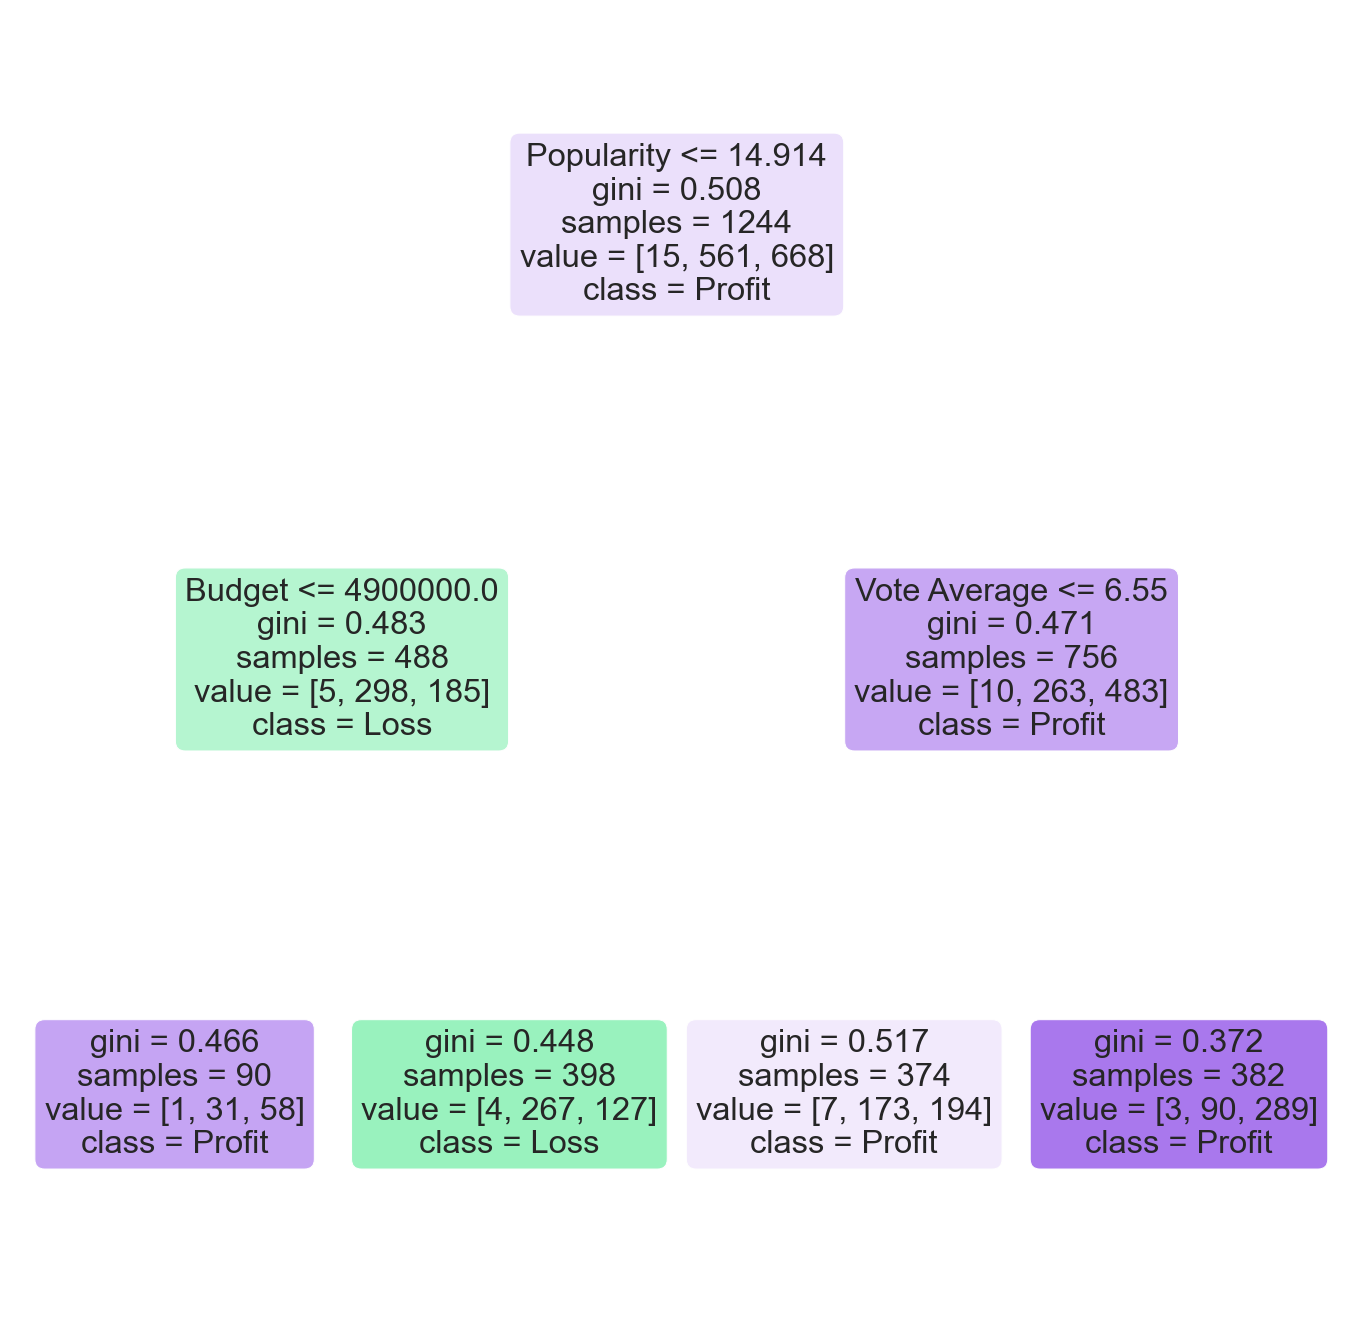

In [32]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_test.columns, 
          class_names=["Breakeven", "Loss", "Profit"])

## Which production companies produces films with the highest revenues?

Data Exploration 
- Convert the data into a dataframe
- Look at which companies have produced the most number of films
- Look at the companies that have films in the top 10 highest revenue and highest budgeted films
- Companies that have the highest total revenue and highest mean revenue

In [33]:
df["Production Companies"] = df["Production Companies"].apply(eval)
df["Production Companies"]

1              [Warner Bros. Pictures, Legendary Pictures]
11       [CAPCOM, Constantin Film, Impact Pictures, Ten...
13       [Warner Animation Group, Warner Bros. Pictures...
15       [DC Entertainment, Warner Bros. Pictures, The ...
23       [Toho Company, Ltd., Universal International P...
                               ...                        
19973          [Fox 2000 Pictures, Scott Free Productions]
19977    [I Could Never Ltd., Scott Rudin Productions, ...
19983       [Columbia Pictures, Castle Rock Entertainment]
19989    [Regency Enterprises, New Regency Pictures, Ep...
19993              [Caravan Pictures, Touchstone Pictures]
Name: Production Companies, Length: 4316, dtype: object

In [34]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [35]:
production_companies = pd.DataFrame(to_1D(df["Production Companies"]).value_counts(), columns = ['No.of Films'])
production_companies.head()

No.of Films
Warner Bros. Pictures          415
Universal Pictures             393
Columbia Pictures              303
Paramount                      296
20th Century Fox               277

In [36]:
production_companies.describe()

No.of Films
count  4807.000000
mean      3.201997
std      13.255114
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     415.000000

#### Top 10 Production Companies by quantity of films 

In [37]:
production_companies.sort_values(by = 'No.of Films', ascending = True)
production_companies.head(n = 10)

No.of Films
Warner Bros. Pictures          415
Universal Pictures             393
Columbia Pictures              303
Paramount                      296
20th Century Fox               277
New Line Cinema                168
Walt Disney Pictures           163
Metro-Goldwyn-Mayer            126
Sony Pictures                  114
Relativity Media               114

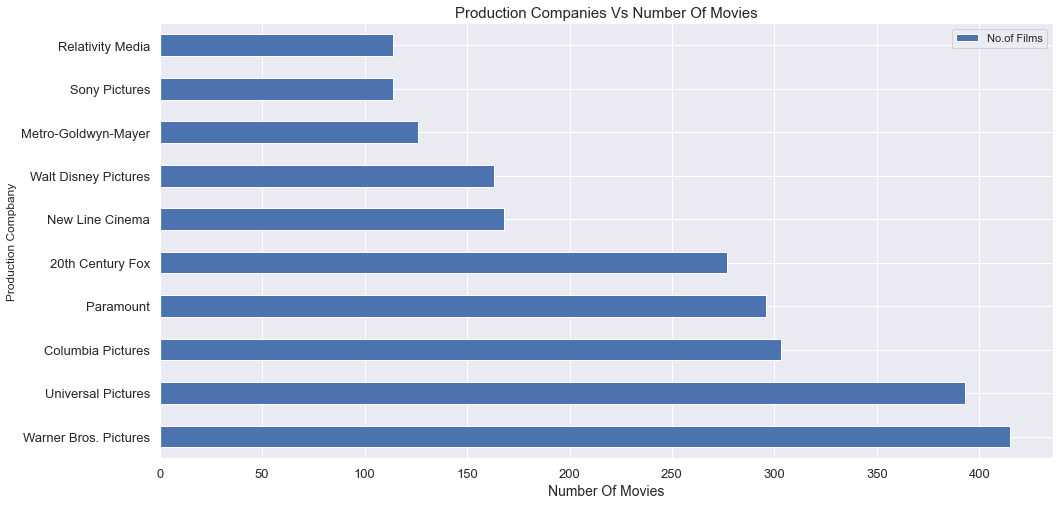

In [38]:
production_companies.iloc[:10].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
plt.ylabel("Production Compbany")
sb.set_style("whitegrid")

In [39]:
companyData = pd.DataFrame(df[['Production Companies', 'Budget', 'Revenue']])

# Inserting a Profit Columnn
companyData['Profit'] = companyData['Revenue'] - companyData['Budget']

# Remove those with negative profit (since we want to see which production firms have the highest budgets and revenues)
companyData = companyData.loc[(companyData['Profit'] > 0)]
companyData.head()

Production Companies       Budget  \
13  [Warner Animation Group, Warner Bros. Pictures...   50000000.0   
23  [Toho Company, Ltd., Universal International P...      12000.0   
39  [Legendary Pictures, Warner Bros. Pictures, Hu...  170000000.0   
41         [Universal Pictures, DreamWorks Animation]   65000000.0   
51  [DC Entertainment, LuckyChap Entertainment, Kr...   75000000.0   

        Revenue       Profit  
13   66890000.0   16890000.0  
23    2700000.0    2688000.0  
39  386600138.0  216600138.0  
41  135076090.0   70076090.0  
51  201858461.0  126858461.0

In [40]:
# Reset the indexes 
companyData = companyData.reset_index(drop = True)
companyData.head()

Production Companies       Budget  \
0  [Warner Animation Group, Warner Bros. Pictures...   50000000.0   
1  [Toho Company, Ltd., Universal International P...      12000.0   
2  [Legendary Pictures, Warner Bros. Pictures, Hu...  170000000.0   
3         [Universal Pictures, DreamWorks Animation]   65000000.0   
4  [DC Entertainment, LuckyChap Entertainment, Kr...   75000000.0   

       Revenue       Profit  
0   66890000.0   16890000.0  
1    2700000.0    2688000.0  
2  386600138.0  216600138.0  
3  135076090.0   70076090.0  
4  201858461.0  126858461.0

Extract out only the main production company 

In [41]:
production_companies = companyData['Production Companies'].apply(pd.Series)
production_companies.shape

(3272, 26)

In [42]:
col_to_drop = [x for x in range(1, 26)]

# Only going to take the first column as the main production company
main_production_company = production_companies.drop(columns = col_to_drop)

# Concat this to the original df
df_final = pd.concat([main_production_company, companyData], axis=1)
df_final = df_final.drop(columns = "Production Companies")
df_final.columns = ["Main Production Company", "Budget", "Revenue", "Profit"]

# Set index as the main production company
df_final = df_final.set_index("Main Production Company")
df_final.head()

Budget      Revenue       Profit
Main Production Company                                       
Warner Animation Group    50000000.0   66890000.0   16890000.0
Toho Company, Ltd.           12000.0    2700000.0    2688000.0
Legendary Pictures       170000000.0  386600138.0  216600138.0
Universal Pictures        65000000.0  135076090.0   70076090.0
DC Entertainment          75000000.0  201858461.0  126858461.0

In [43]:
profit_eval = pd.DataFrame(df_final["Profit"])
profit_eval = profit_eval.sort_values(by = 'Profit', ascending = False)
profit_eval.head(n = 10)

Profit
Main Production Company                
Dune Entertainment         2.550965e+09
Marvel Studios             2.441801e+09
Paramount                  1.987464e+09
Lucasfilm Ltd.             1.823224e+09
Marvel Studios             1.746240e+09
Amblin Entertainment       1.521713e+09
Walt Disney Pictures       1.396943e+09
Abu Dhabi Film Commission  1.325048e+09
Walt Disney Pictures       1.300027e+09
Marvel Studios             1.298816e+09

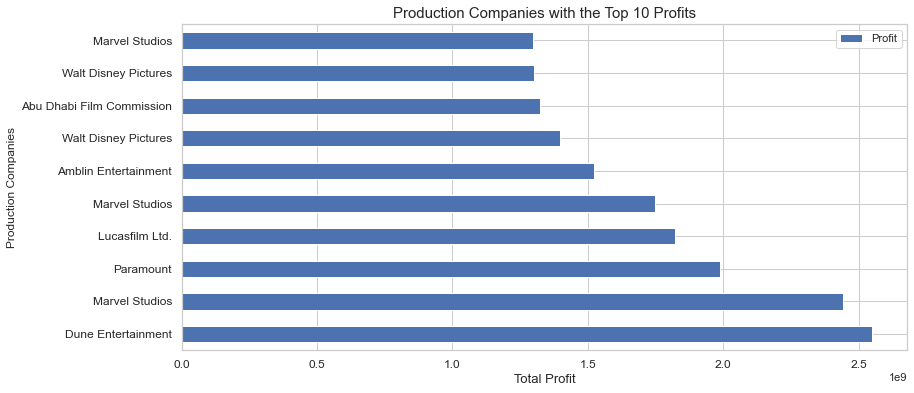

In [44]:
# Plot Bar Graph
profit_eval.iloc[:10].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies with the Top 10 Profits",fontsize=15)
plt.xlabel('Total Profit',fontsize=13)
plt.ylabel('Production Companies')
sb.set_style("whitegrid")

In [45]:
revenue_eval = pd.DataFrame(df_final["Revenue"])
revenue_eval = revenue_eval.sort_values(by = 'Revenue', ascending = False)
revenue_eval.head(n = 10)

Revenue
Main Production Company                
Marvel Studios             2.797801e+09
Dune Entertainment         2.787965e+09
Paramount                  2.187464e+09
Lucasfilm Ltd.             2.068224e+09
Marvel Studios             2.046240e+09
Amblin Entertainment       1.671713e+09
Walt Disney Pictures       1.656943e+09
Marvel Studios             1.518816e+09
Abu Dhabi Film Commission  1.515048e+09
Walt Disney Pictures       1.450027e+09

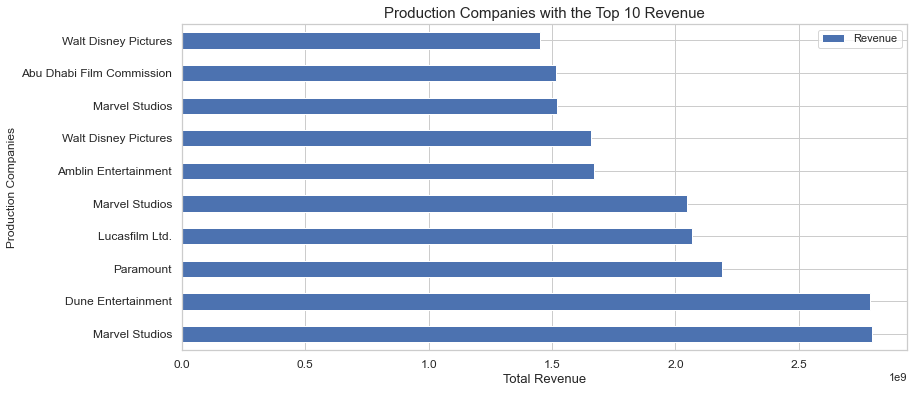

In [46]:
# Plot Bar Graph
revenue_eval.iloc[:10].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies with the Top 10 Revenue",fontsize=15)
plt.xlabel('Total Revenue',fontsize=13)
plt.ylabel('Production Companies')
sb.set_style("whitegrid")

In [47]:
# Sort the data and get the top 10 
budget_eval = pd.DataFrame(df_final["Revenue"])
budget_eval = budget_eval.sort_values(by = 'Revenue', ascending = False)
budget_eval.head(n = 10)

Revenue
Main Production Company                
Marvel Studios             2.797801e+09
Dune Entertainment         2.787965e+09
Paramount                  2.187464e+09
Lucasfilm Ltd.             2.068224e+09
Marvel Studios             2.046240e+09
Amblin Entertainment       1.671713e+09
Walt Disney Pictures       1.656943e+09
Marvel Studios             1.518816e+09
Abu Dhabi Film Commission  1.515048e+09
Walt Disney Pictures       1.450027e+09

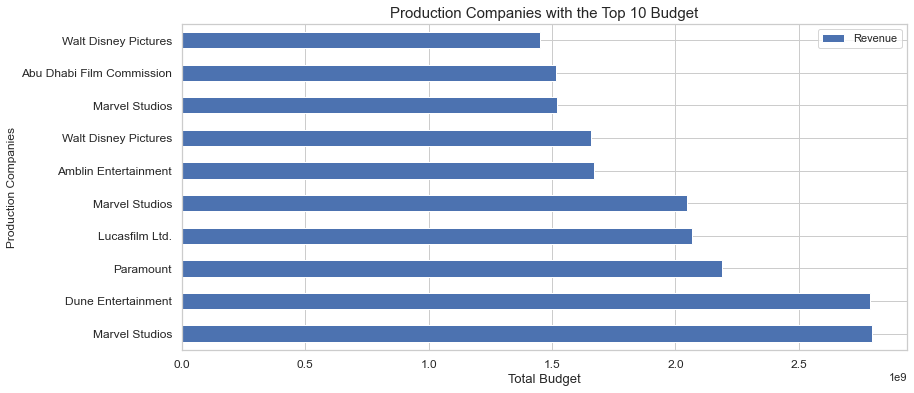

In [48]:
budget_eval.iloc[:10].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies with the Top 10 Budget",fontsize=15)
plt.xlabel('Total Budget',fontsize=13)
plt.ylabel('Production Companies')
sb.set_style("whitegrid")

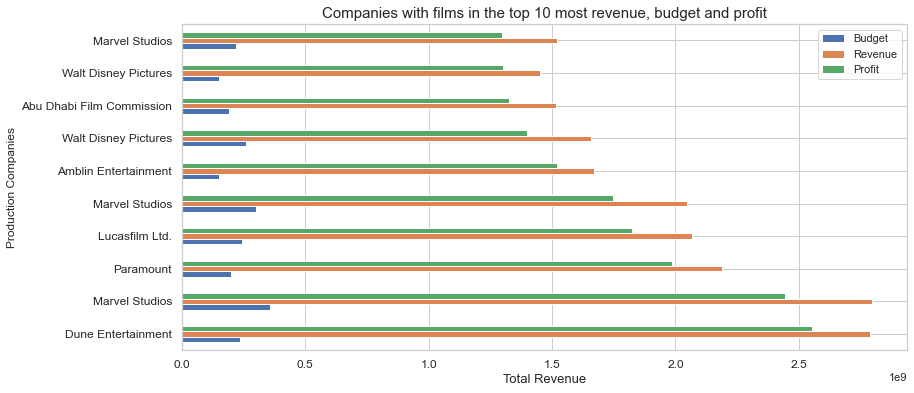

In [49]:
df_final = df_final.sort_values(by = "Profit", ascending = False)

df_final.iloc[:10].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Companies with films in the top 10 most revenue, budget and profit",fontsize=15)
plt.xlabel('Total Revenue',fontsize=13)
plt.ylabel('Production Companies')
sb.set_style("whitegrid")

Group the companies and explore the total and mean revenue

In [50]:
df_final = df_final.reset_index()
df_final.head()

Main Production Company       Budget       Revenue        Profit
0      Dune Entertainment  237000000.0  2.787965e+09  2.550965e+09
1          Marvel Studios  356000000.0  2.797801e+09  2.441801e+09
2               Paramount  200000000.0  2.187464e+09  1.987464e+09
3          Lucasfilm Ltd.  245000000.0  2.068224e+09  1.823224e+09
4          Marvel Studios  300000000.0  2.046240e+09  1.746240e+09

In [51]:
# Group the elements by sum and mean respectively
df_sum = df_final.groupby('Main Production Company').sum()
df_mean = df_final.groupby('Main Production Company').mean()

In [52]:
top_10_sum_revenue = pd.DataFrame(df_sum[["Revenue"]]).sort_values(by = "Revenue", ascending = False)
top_10_mean_revenue = pd.DataFrame(df_mean[["Revenue"]]).sort_values(by = "Revenue", ascending = False)

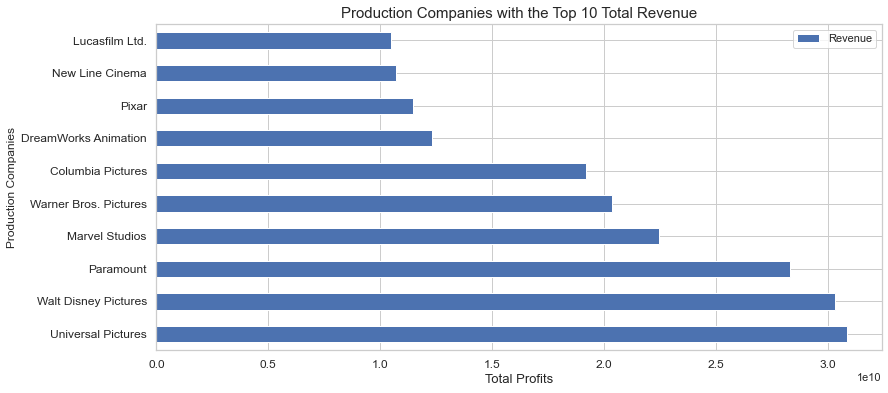

In [53]:
top_10_sum_revenue.iloc[:10].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies with the Top 10 Total Revenue",fontsize=15)
plt.xlabel('Total Profits',fontsize=13)
plt.ylabel('Production Companies')
sb.set_style("whitegrid")

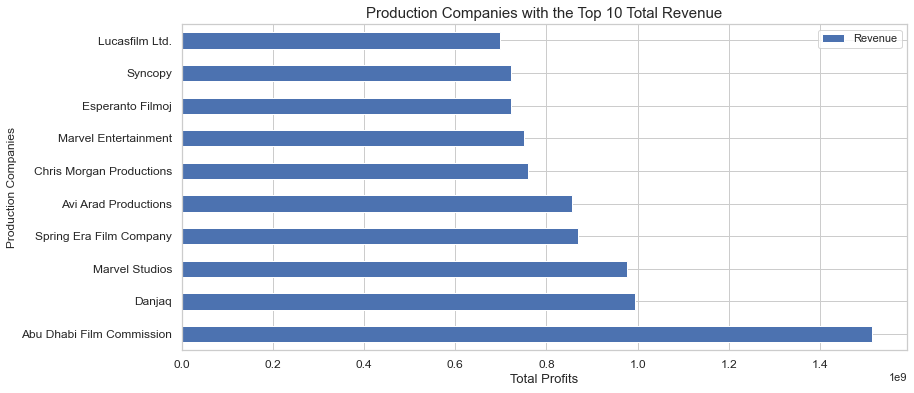

In [54]:
top_10_mean_revenue.iloc[:10].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies with the Top 10 Total Revenue",fontsize=15)
plt.xlabel('Total Profits',fontsize=13)
plt.ylabel('Production Companies')
sb.set_style("whitegrid")

## Which actor tends to have the greatest influence over the revenue of the film?

In [55]:
nodes = []
#Get the top three cast in every movie
for cast in df['Main Cast']:
    try:
        cast[1 : -1].split(', ')[2]
    except IndexError:
        continue
    cast_top_three = [cast[1 : -1].split(', ')[0][1 : -1], cast[1 : -1].split(', ')[1][1 : -1], cast[1 : -1].split(', ')[2][1 : -1]]
    for cast in cast_top_three:
        nodes.append(cast)

#Get the number of movies that each actor acted in
nodes_count = {}
for actor in nodes:
    if actor not in nodes_count:
        nodes_count[actor] = nodes.count(actor)
        
#Remove actors with less than 5 movies acted in
for actor in nodes_count.copy().keys():
    if nodes_count[actor] < 5:
        nodes_count.pop(actor)
        
nodes = [actor for actor in nodes_count.keys()]

In [56]:
edges = []
for cast in df['Main Cast']:
    try:
        cast[1 : -1].split(', ')[2]
    except IndexError:
        continue
    cast_top_three = [cast[1 : -1].split(', ')[0][1 : -1], cast[1 : -1].split(', ')[1][1 : -1], cast[1 : -1].split(', ')[2][1 : -1]]
    edges_to_add = itertools.combinations(cast_top_three, 2)
    for edge in edges_to_add:
        #Check if actor acted in more than 5 movies and that edge is not repeated
        if ((edge[0] in nodes) and (edge[1] in nodes) and ((edge[1], edge[0]) not in edges) and (edge not in edges)):
            edges.append(edge)

In [57]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 654
Number of edges: 4083
Average degree:  12.4862


In [58]:
nx.set_node_attributes(G, nodes_count, 'connections')

In [59]:
pos = nx.kamada_kawai_layout(G)

In [60]:
node_x = []
node_y = []
for actor in nodes:
    node_x.append(pos[actor][0])
    node_y.append(pos[actor][1])

node_trace = go.Scatter(
    x = node_x, y = node_y,
    mode = 'markers',
    hoverinfo = 'text',
    marker = dict(
        showscale = True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale = 'YlGnBu',
        reversescale = True,
        color = [],
        size = 10,
        colorbar = dict(
            thickness = 15,
            title = 'Node Connections',
            xanchor = 'left',
            titleside = 'right'
        ),
        line_width = 2),
    text = nodes,
    )

In [61]:
edge_x = []
edge_y = []

for edge in edges:
    edge_x.append(pos[edge[0]][0]) #X-coordinate of first actor
    edge_x.append(pos[edge[1]][0]) #X-coordinate of second actor
    edge_x.append(None)
    edge_y.append(pos[edge[0]][1]) #Y-coordinate of first actor
    edge_y.append(pos[edge[1]][1]) #Y-coordinate of second actor
    edge_y.append(None)

edge_trace  =  go.Scatter(
    x = edge_x, y = edge_y,
    line = dict(width = 0.5, color = '#888'),
    hoverinfo = 'none',
    mode = 'lines')

In [62]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(adjacencies[0] + ' Connections: '+ str(len(adjacencies[1]))) #Count the number of connections per actor

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [63]:
fig = go.Figure(data = [edge_trace, node_trace],
             layout = go.Layout(
                title = 'Actors and their connections',
                titlefont_size = 20,
                showlegend = False,
                hovermode = 'closest',
                margin = dict(b = 20,l = 5,r = 5,t = 40),        
                xaxis = dict(showgrid = False, zeroline = False, showticklabels = False),
                yaxis = dict(showgrid = False, zeroline = False, showticklabels = False))
                )
fig.update_layout(
    autosize = False,
    width = 900,
    height = 800,)
fig.show()

#### Analaysis of the Top Ten Actors with the most connections

In [64]:
Actors_Connections = {node: 0 for node in nodes}
for edge in edges:
    Actors_Connections[edge[0]] += 1
    Actors_Connections[edge[1]] += 1

In [65]:
Actors = pd.DataFrame(Actors_Connections.items(), columns = ['Actor', 'Connections'])
Actors = Actors.sort_values(['Connections'], ascending = [0])
Actors = Actors.head(10)
Actors['Max Revenue'], Actors['Max Budget'], Actors['Average Revenue'], Actors['Average Budget'], Actors['Average profit'] = [0, 0, 0, 0, 0]

In [66]:
for Actor in Actors['Actor']:
    selected = df.loc[df['Main Cast'].str.contains(Actor)]
    selected_revenue = selected['Revenue']
    selected_budget = selected['Budget']
    Actors.loc[Actors['Actor'] == Actor, 'Max Revenue'] = selected_revenue.max()
    Actors.loc[Actors['Actor'] == Actor, 'Max Budget'] = selected_budget.max()
    Actors.loc[Actors['Actor'] == Actor, 'Average Revenue'] = selected_revenue.mean()
    Actors.loc[Actors['Actor'] == Actor, 'Average Budget'] = selected_budget.mean()
    Actors.loc[Actors['Actor'] == Actor, 'Average Profit'] = selected_revenue.mean() - selected_budget.mean()
    

In [67]:
fig = go.Figure()

trace1 = go.Bar(name = 'Max Revenue', y = Actors['Max Revenue'], x = Actors['Actor'])
trace2 = go.Bar(name = 'Max Budget', y = Actors['Max Budget'], x = Actors['Actor'])
trace3 = go.Bar(name = 'Average Revenue', y = Actors['Average Revenue'], x = Actors['Actor'])
trace4 = go.Bar(name = 'Average Budget', y = Actors['Average Budget'], x = Actors['Actor'])
trace5 = go.Bar(name = 'Average Profit', y = Actors['Average Profit'], x = Actors['Actor'])
data = [trace1, trace2, trace3, trace4, trace5]
updatemenus = [{'buttons' : [{'method' : 'update',
                               'label' : 'All',
                               'args' : [{'visible' : [True] * 5}]
                                },
                              {'method' : 'update',
                               'label' : 'Max Revenue',
                               'args' : [{'visible' : [True, False, False, False, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Max Budget',
                               'args' : [{'visible' : [False, True, False, False, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Average Revenue',
                               'args' : [{'visible' : [False, False, True, False, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Average Budget',
                               'args' : [{'visible' : [False, False, False, True, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Average Profit',
                               'args' : [{'visible' : [False, False, False, False, True]}]
                                }],
                              'direction' : 'down',
                              'showactive' : True
                               }]
layout = dict(title = 'Actors comparison',
              showlegend = True,
              xaxis = dict(title = 'Actor'),
              yaxis = dict(title = 'Value'),
              updatemenus = updatemenus)
fig = go.Figure(data = data, layout = layout)
fig.show()

## Which genre type of movie tends to have higher revenues?

In [68]:
Genre_Count = {}
for genre_list in df['Genres']:
    genre_list = genre_list[1:-1].split(', ')
    for genre in genre_list:
        if genre[1 : -1] not in Genre_Count:
            Genre_Count[genre[1 : -1]] = 1
        else:
            Genre_Count[genre[1 : -1]] += 1
    

In [69]:
print(Genre_Count)

{'Action': 1299, 'Science Fiction': 614, 'Fantasy': 558, 'Adventure': 946, 'Comedy': 1430, 'Family': 576, 'Thriller': 1286, 'Crime': 699, 'Animation': 327, 'Drama': 1782, 'Music': 133, 'Horror': 604, 'Romance': 673, 'History': 213, 'War': 154, 'Mystery': 396, 'Western': 66, 'TV Movie': 3, 'Documentary': 24}


In [70]:
genres = pd.DataFrame(Genre_Count.items(), columns=['Genre', 'Count'])
genres

Genre  Count
0            Action   1299
1   Science Fiction    614
2           Fantasy    558
3         Adventure    946
4            Comedy   1430
5            Family    576
6          Thriller   1286
7             Crime    699
8         Animation    327
9             Drama   1782
10            Music    133
11           Horror    604
12          Romance    673
13          History    213
14              War    154
15          Mystery    396
16          Western     66
17         TV Movie      3
18      Documentary     24

<AxesSubplot:xlabel='Genre', ylabel='Count'>

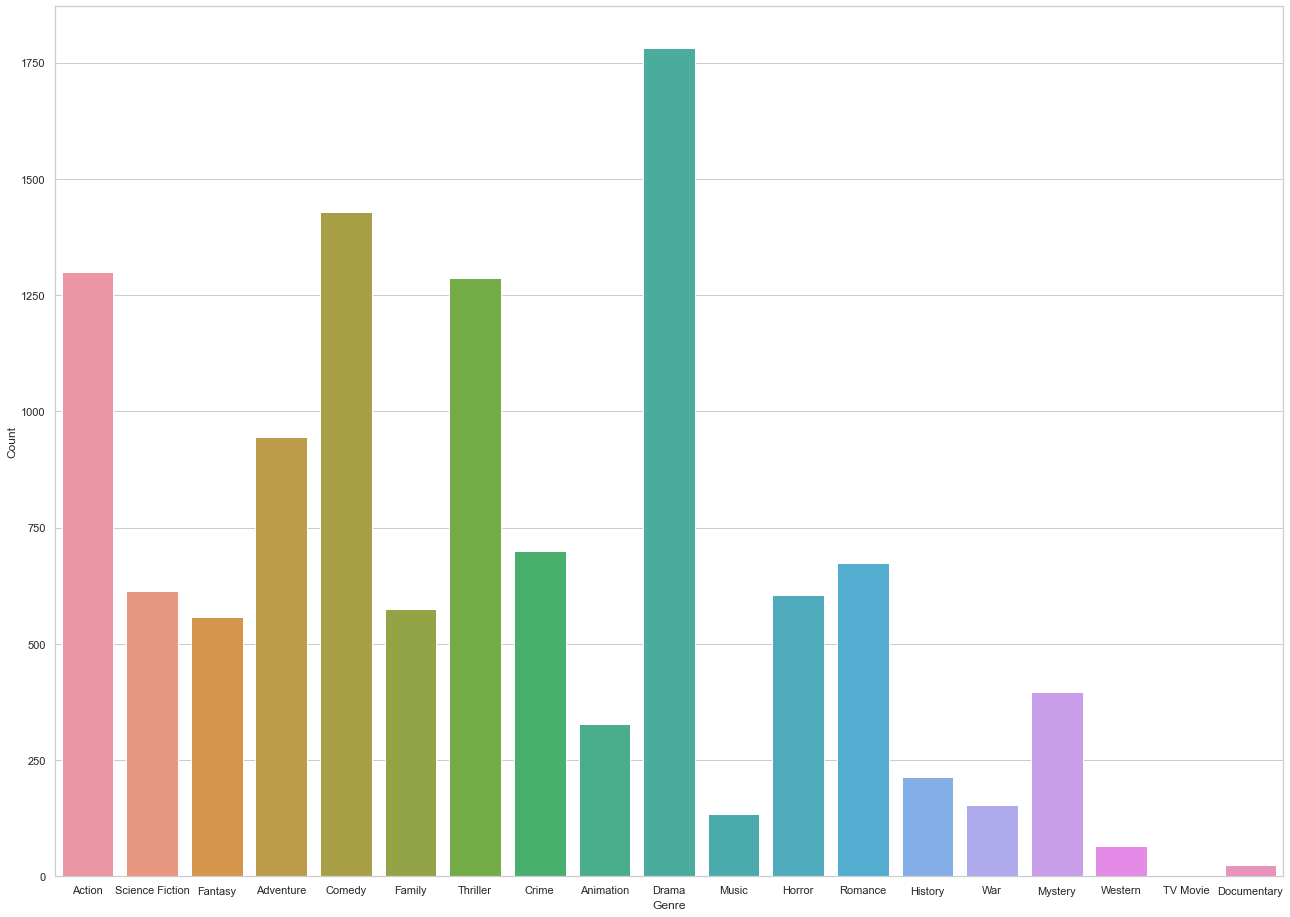

In [71]:
f= plt.figure(figsize = (22, 16))
sb.barplot(data = genres, x = "Genre", y = 'Count')

In [72]:
genres['Max Revenue'], genres['Max Budget'], genres['Average Revenue'], genres['Average Budget'], genres['Average Profit'] = 0, 0, 0, 0, 0

In [73]:
for genre in Genre_Count.keys():
    selected_genre = df.loc[df['Genres'].str.contains(genre)]
    selected_genre_Revenue = selected_genre['Revenue']
    selected_genre_Budget = selected_genre['Budget']
    genres.loc[genres['Genre'] == genre, 'Max Revenue'] = selected_genre_Revenue.max()
    genres.loc[genres['Genre'] == genre, 'Max Budget'] = selected_genre_Budget.max()
    genres.loc[genres['Genre'] == genre, 'Average Revenue'] = selected_genre_Revenue.mean()
    genres.loc[genres['Genre'] == genre, 'Average Budget'] = selected_genre_Budget.mean()
    genres.loc[genres['Genre'] == genre, 'Average Profit'] = selected_genre_Revenue.mean() - selected_genre_Budget.mean()

In [74]:
genres

Genre  Count  Max Revenue  Max Budget  Average Revenue  \
0            Action   1299   2797800564   380000000     1.766437e+08   
1   Science Fiction    614   2797800564   356000000     1.892722e+08   
2           Fantasy    558   2787965087   380000000     2.180494e+08   
3         Adventure    946   2797800564   380000000     2.515430e+08   
4            Comedy   1430   1450026933   230000000     1.217754e+08   
5            Family    576   1656943394   260000000     1.992032e+08   
6          Thriller   1286   1671713208   250000000     9.471098e+07   
7             Crime    699   1238764765   250000000     8.296497e+07   
8         Animation    327   1656943394   260000000     2.404812e+08   
9             Drama   1782   2187463944   250000000     8.769735e+07   
10            Music    133   1450026933   175000000     1.082475e+08   
11           Horror    604    701796444   200000000     5.885046e+07   
12          Romance    673   2187463944   200000000     1.019860e+08   
13          History    213    894027543   175000000     8.413541e+07   
14              War    154    870322670   175000000     1.064650e+08   
15          Mystery    396    938212738   190000000     8.864576e+07   
16          Western     66    532950503   255000000     7.779320e+07   
17         TV Movie      3      8900000     7000000     3.404961e+06   
18      Documentary     24    261200000    60000000     4.843082e+07   

    Average Budget  Average Profit  
0     6.012937e+07    1.165143e+08  
1     6.175187e+07    1.275203e+08  
2     6.843503e+07    1.496144e+08  
3     7.544429e+07    1.760987e+08  
4     3.830096e+07    8.347441e+07  
5     6.102207e+07    1.381811e+08  
6     3.561797e+07    5.909301e+07  
7     3.257807e+07    5.038690e+07  
8     6.717129e+07    1.733099e+08  
9     3.033073e+07    5.736662e+07  
10    2.889551e+07    7.935202e+07  
11    1.765193e+07    4.119853e+07  
12    2.971936e+07    7.226667e+07  
13    3.849726e+07    4.563816e+07  
14    4.215974e+07    6.430521e+07  
15    3.220537e+07    5.644039e+07  
16    4.041047e+07    3.738273e+07  
17    3.710059e+06   -3.050983e+05  
18    9.269981e+06    3.916084e+07

In [84]:
trace1 = go.Bar(name = 'Max Revenue', y = genres['Max Revenue'], x = genres['Genre'])
trace2 = go.Bar(name = 'Max Revenue', y = genres['Max Budget'], x = genres['Genre'])
trace3 = go.Bar(name = 'Average Revenue', y = genres['Average Revenue'], x = genres['Genre'])
trace4 = go.Bar(name = 'Average Budget', y = genres['Average Budget'], x = genres['Genre'])
trace5 = go.Bar(name = 'Average Profit', y = genres['Average Profit'], x = genres['Genre'])
data = [trace1, trace2, trace3, trace4, trace5]
updatemenus = [{'buttons' : [{'method' : 'update',
                               'label' : 'All',
                               'args' : [{'visible' : [True] * 5}]
                                },
                              {'method' : 'update',
                               'label' : 'Max Revenue',
                               'args' : [{'visible' : [True, False, False, False, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Max Budget',
                               'args' : [{'visible' : [False, True, False, False, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Average Revenue',
                               'args' : [{'visible' : [False, False, True, False, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Average Budget',
                               'args' : [{'visible' : [False, False, False, True, False]}]
                                },
                              {'method' : 'update',
                               'label' : 'Average Profit',
                               'args' : [{'visible' : [False, False, False, False, True]}]
                                }],
                              'direction' : 'down',
                              'showactive' : True,
                              'xanchor' : "center", "yanchor": "bottom"                    
                               }]
layout = dict(title = 'Genres Comparison',
              showlegend = True,
              xaxis = dict(title = 'genre'),
              yaxis = dict(title = 'Value'),
              updatemenus = updatemenus)
fig = go.Figure(data = data, layout = layout)
fig.show()